Данный notebook создан на основе материалов курсов [«Программирование на языке Python для сбора и анализа данных» (НИУ ВШЭ, 2015-16)](http://math-info.hse.ru/s15/m) и русской версии курса [Lorena A. Barba](http://lorenabarba.com) [**"Practical Numerical Methods with Python"**](http://openedx.seas.gwu.edu/courses/GW/MAE6286/2014_fall/about). Он распространяется на условиях лицензии [Creative Commons Attribution-Share Alike 4.0](http://creativecommons.org/licenses/by-sa/4.0/). 

# Краткое введение в numpy и matplotlib

## Numpy

Писать программы на Python легко и приятно. Гораздо легче и приятнее, чем на низкоуровневых языках программирования, таких как C или C++. Но, увы, чудес не бывает: за простоту написания кода мы платим скоростью его исполнения.

In [3]:
numbers = [1.2] * 10000
numbers[:10]

[1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]

Мы создали список из 10000 чисел. Для простоты они все одинаковые, но Python об этом не знает. Как быстро мы возведём каждое из них в квадрат?
Для проверки, с какой скоростью выполняется некоторый фрагмент кода, полезно использовать магическое слово %%timeit. Оно говорит, что ячейку нужно выполнить несколько раз и засечь, сколько времени на это ушло.

In [4]:
%%timeit

squares = [x**2 for x in numbers]

100 loops, best of 3: 2.25 ms per loop


Больше миллисекунды на один проход! (Кстати, x*x будет в два раза быстрее — попробуйте!) Не очень-то быстро, на самом деле. Для «тяжелой» математики, часто возникающей при обработке больших массивов данных, хочется использовать все возможности компьютера.
Но не надо отчаиваться: для быстрой работы с числами есть специальные библиотеки, и главная из них — numpy.

In [5]:
import numpy as np

Главный объект, с которым мы будем работать — это `np.array` (на самом деле он называется `np.ndarray`):

In [6]:
np_numbers = np.array(numbers)

In [7]:
np_numbers

array([ 1.2,  1.2,  1.2, ...,  1.2,  1.2,  1.2])

`np.array` — это специальный тип данных, похожий на список, но содержащий данные только одного типа (в данном случае — только вещественные числа). 

In [8]:
np_numbers[3]

1.2

In [9]:
len(np_numbers)

10000

С математической точки зрения, `np.array` — это что-то, похожее на вектор. Но практически все операции выполняются поэлементно. Например, возведение в квадрат каждого элемента можно реализовать как `np_numbers**2`.

Посмотрим, как быстро работает эта операция:

In [12]:
%%timeit

np_squares = np_numbers**2

The slowest run took 47.93 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 5.05 µs per loop


Здесь 5 микросекунд, в 200 раз быстрее! Правда, нас предупреждают, что это может быть последствия кеширования — но в любом случае, работа с массивами чисел с помощью `numpy` происходит гораздо быстрее, чем с помощью обычных списков и циклов.
Давайте посмотрим на `np.array` более подробно.

### Массивы похожи на списки…

In [48]:
from numpy import array
# чтобы не писать каждый раз np

In [49]:
q = array([4, 5, 8, 9])

In [50]:
q[0]

4

И менять их тоже можно

In [51]:
q[0] = 12
q

array([12,  5,  8,  9])

Можно итерировать элементы списка, хотя этого следует по возможности избегать — массивы `numpy` нужны как раз для того, чтобы не использовать циклы для выполнения массовых операций. Ниже будет понятно, как это можно делать.

In [52]:
for x in q:
    print(x)

12
5
8
9


Можно делать срезы (но с ними тоже есть хитрости, об этом ниже).

In [53]:
q[1:3]

array([5, 8])

### …но не всегда похожи!

Давайте заведём ещё один массив.

In [54]:
w = array([2, 3, 6, 10])

Все арифметические операции над массивами выполняются поэлементно. Поэтому `+` означает сложение, а не конкатенацию. В отличие от обычных списков.

In [55]:
q + w

array([14,  8, 14, 19])

Если вы хотели сделать конкатенацию, то нужно использовать не оператор сложения, а специальную функцию.

In [56]:
np.concatenate( [q, w] )

array([12,  5,  8,  9,  2,  3,  6, 10])

Аналогично сложению работают и другие операции. Например, умножение:

In [57]:
q * w

array([24, 15, 48, 90])

Если у массивов будет разная длина, то ничего не получится:

In [58]:
q = np.array([14, 8, 14, 9])
w = np.array([1, 3, 4])
q + w

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

Можно применять различные математические операции к массивам.

In [59]:
x = array([1,2,3,4,5])
y = array([4, 5, 6, 2, 1])

In [60]:
np.exp(x)

array([   2.71828183,    7.3890561 ,   20.08553692,   54.59815003,
        148.4131591 ])

Заметим, что мы должны были использовать функцию `exp` из `numpy`, а не из обычного `math`. Если бы мы взяли эту функцию из `math`, ничего бы не сработало.

In [61]:
import math

In [62]:
math.sqrt(x)

TypeError: only length-1 arrays can be converted to Python scalars

Вообще в `numpy` много математических функций. Вот, например, квадратный корень:

In [63]:
np.sqrt(x)

array([ 1.        ,  1.41421356,  1.73205081,  2.        ,  2.23606798])

### Коварные срезы

Давайте посмотрим внимательно на срезы.

In [64]:
x = array([1.1, 2.2, 3.3, 4.4, 5.5])

In [65]:
s = x[1:3]

In [66]:
s

array([ 2.2,  3.3])

Пока всё идёт как обычно: мы создали срез, начинающийся с элемента с индексом 1 (то есть второй элемент, нумерация с нуля) и заканчивающийся элементом с индексом 3 (последний элемент всегда не включается).

Теперь попробуем изменить значение элемента *в срезе*:

In [67]:
s[0] = 100

In [68]:
s

array([ 100. ,    3.3])

Как вы думаете, что произойдёт с исходным массивом `x`?

In [70]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

Он тоже изменился! Раньше мы видели подобную штуку в ситуациях, когда один список имел несколько имён (то есть несколько переменных на него ссылались), но создание среза раньше приводило к копированию информации. Оказывается, в numpy создание среза ничего не копирует: срез — это не новый массив, содержащий те же элементы, что старый, а так называемый *view* (вид), то есть своего рода интерфейс к старому массиву. Грубо говоря, наш срез `s` просто помнит, что «его» элемент с индексом 0 — это на самом деле элемент с индексом 1 от исходного массива `x`, а его элемент с индексом 1 — это на самом деле элемент с индексом 2 от исходного массива, а других элементов у него нет. Можно думать про срез как про такие специальные очки, через которые мы смотрим на исходный массив.

Преимущество и этого подхода два: во-первых, непосвященные сломают голову, пытаясь понять, что тут происходит, а во-вторых если у нас есть огромный массив данных, то нам не придётся тратить ресурсы на то, чтобы его скопировать, если нам нужно сделать срез. Недостатки тоже есть, но они являются продолжением первого из преимуществ.

Если вам всё-таки нужно сделать копию массива, нужно использовать метод `copy()`.

In [72]:
y = x.copy()

In [73]:
y

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [74]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [75]:
y[0] = 12

In [76]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [77]:
y

array([  12. ,  100. ,    3.3,    4.4,    5.5])

In [78]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

### Продвинутая индексация

Помимо коварных срезов есть ещё некоторые возможности создания новых массивов из старых. Например, можно выбрать из массива элементы с нужными номерами вот так:

In [81]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [82]:
y = x[ [1, 3, 4] ]

In [83]:
y

array([ 100. ,    4.4,    5.5])

Можно даже использовать одинаковые номера.

In [86]:
y = x[ [1, 1, 1] ]

In [87]:
y

array([ 100.,  100.,  100.])

Кстати, создаваемый таким образом объект уже является честной копией исходного, а не каким-нибудь коварным видом.

In [88]:
y[0] = 123

In [89]:
y

array([ 123.,  100.,  100.])

In [90]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [91]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

Есть ещё один хитрый способ выбора элементов из массива. Допустим, мы хотим выбрать только те элементы, которые обладают каким-то свойством — скажем, меньше 50. Можно было бы использовать цикл с условием или аналогичный ему list comprehension, но в `numpy` используют другой синтаксис.

In [92]:
y = x[ x < 50 ]

In [93]:
x

array([   1.1,  100. ,    3.3,    4.4,    5.5])

In [94]:
y

array([ 1.1,  3.3,  4.4,  5.5])

Как он работает? Очень просто. (Ну ок, не очень.) Для начала, что такое `x < 50`? Это результат применения операции «сравнение с 50» к каждому элементу массива. То есть это новый массив.

In [97]:
x < 50

array([ True, False,  True,  True,  True], dtype=bool)

Если в каком-то месте стоит True, то это означает, что на соответствующем месте в x стоит элемент, который удовлетворяет условию, а если False, то не удовлетворяет.

Теперь можно попробовать подставить массив из True и False в качестве индекса в x.

In [98]:
x[ array([ True, False,  True,  True,  True]) ]

array([ 1.1,  3.3,  4.4,  5.5])

Эта штука выбирает ровно те элементы, на чьих местах стоит `True` — то есть ровно те, для которых выполнялось условие. То, что нам нужно!


### Построение графиков в matplotlib
В Python существует много способов строить графики. Мы сейчас рассмотрим самый простой из них, а позже поговорим про более сложные. Для этого нам потребуется библиотека matplotlib, а точнее её часть под названием pyplot. Стандартный способ её импорта выглядит вот так:

In [14]:
import matplotlib.pyplot as plt

Чтобы графики рисовались прямо в ноутбуке, нужно дать вот такую магическую команду:

In [15]:
%matplotlib inline

Простейшее рисование — это функция `plot`, она принимает на вход список $x$-координат, список $y$-координат и рисует соответствующую картинку либо в виде ломаной:

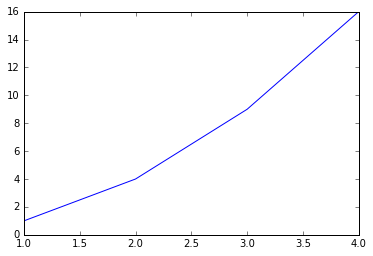

In [16]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])

либо в виде отдельный точек:

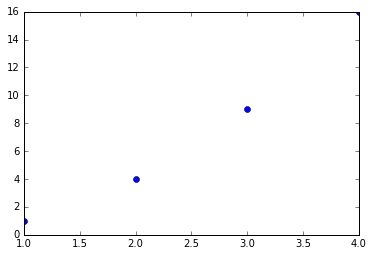

In [17]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'o')

Либо ещё кучей способов.

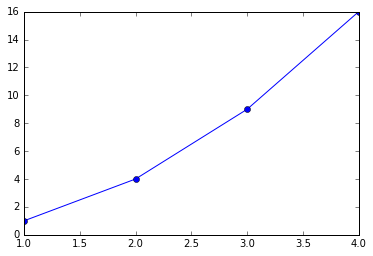

In [18]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], '-o')

Посмотрим, как `numpy` работает в связке с `matplotlib.pyplot`. Вообще это всё очень похое на *MATLAB*, и если вы знаете *MATLAB*, то для вас многое здесь будет знакомо — и наоборот, после `numpy` и `matplotlib.pyplot` будете чувствовать себя как дома в *MATLAB*.

In [31]:
x = np.linspace(-5, 5, 200)
# это массив из 200 элементов, состоящий из равномерно разбросанных чисел от -5 до 5

In [32]:
len(x)

200

In [33]:
x[:10]

array([-5.        , -4.94974874, -4.89949749, -4.84924623, -4.79899497,
       -4.74874372, -4.69849246, -4.64824121, -4.59798995, -4.54773869])

Вот так можно нарисовать параболу:

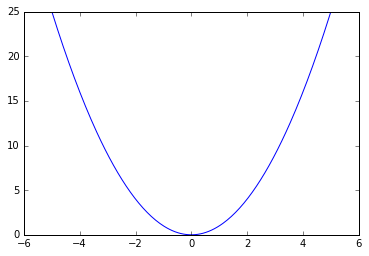

In [34]:
plt.plot(x, x**2)

Действительно, `x**2` — это массив, элементами которого являются квадраты чисел, лежащих в `x`. Значит, построив график, состоящий из точек, $x$-координаты которых записаны в `x`, а $y$-координаты с `x**2`, мы построим график функции $y=x^2$.

А вот, например, синусоида:

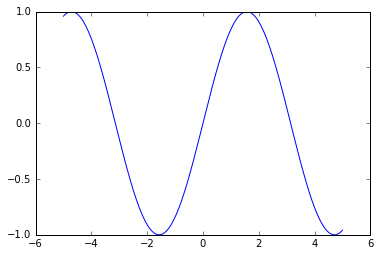

In [35]:
plt.plot(x, np.sin(x))

А вот что-то посложнее:

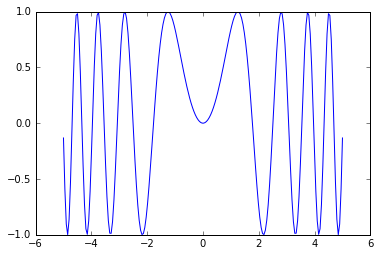

In [36]:
plt.plot(x, np.sin(x**2))

Вот так можно построить несколько графиков и сделать подписи.

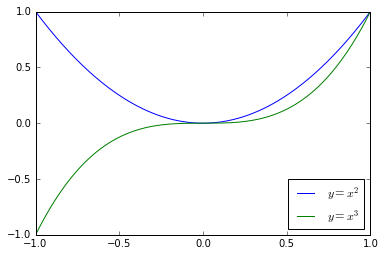

In [37]:
x = np.linspace(-1,1,201)
plt.plot(x,x**2, label = '$y = x^2$')
plt.plot(x,x**3, label = '$y = x^3$')
plt.legend(loc='best')

Знак `$` в `label` используется для того, чтобы записывать формулы — это делается в [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics)-нотации и долларами там обозначается начало и конец формулы. (Кстати, в IPython Notebook в ячейках типа `Markdown` тоже можно записывать формулы в LaTeX-нотации.)

Конечно, мы могли бы получить `x` и `y` не в результате вычисления значений какой-то функции, а откуда-то извне. Возьмём для примера случайные числа.

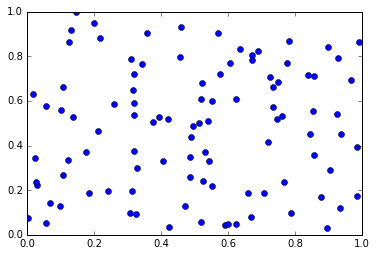

In [38]:
x = np.random.random(100)
y = np.random.random(100)
plt.plot(x,y, 'o')

Есть и специализированная функция для создания *scatter plot*.

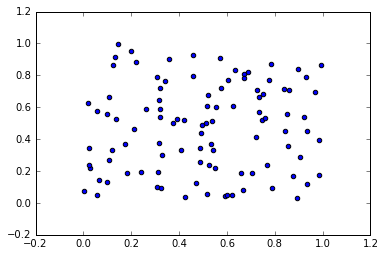

In [39]:
plt.scatter(x,y)

Ещё можно построить [гистограмму](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0#.D0.92_.D1.81.D1.82.D0.B0.D1.82.D0.B8.D1.81.D1.82.D0.B8.D0.BA.D0.B5).

(array([ 10.,  10.,   4.,  14.,  10.,  13.,  10.,  12.,   6.,  11.]),
 array([ 0.00334921,  0.10217447,  0.20099973,  0.29982499,  0.39865024,
         0.4974755 ,  0.59630076,  0.69512602,  0.79395127,  0.89277653,
         0.99160179]),
 <a list of 10 Patch objects>)

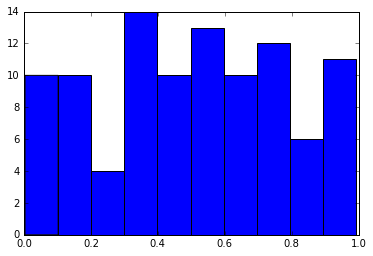

In [40]:
plt.hist(x)

Можно строить трёхмерные картинки, но тут уже нужна магия и я не буду вдаваться в детали.

In [41]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

In [42]:
%matplotlib inline

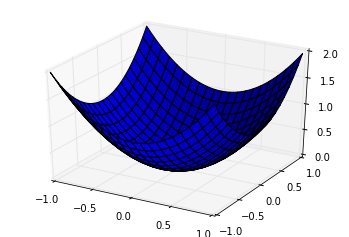

In [43]:
x,y = np.mgrid[-1:1:0.01, -1:1:0.01]
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,x**2+y**2)
fig

Наконец, можно строить интерактивные картинки!

In [44]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def plot_pic(a, b):
    x = np.linspace(-3,3,200)
    plt.plot(x, np.sin(x*a+b))

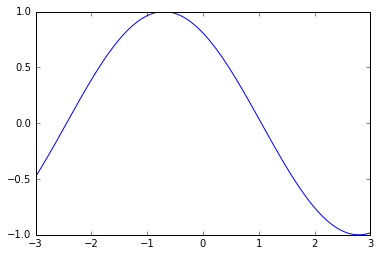

In [46]:
interact(plot_pic, a=[0, 3, 0.1], b=[0, 3, 0.1])

Функция `interact` создаёт несколько бегунков и позволяет с их помощью задавать параметры у функции (в данном случае `plot_pic`), которая строит график.

> Эта картинка не будет интерактивной при просмотре IPython Notebook, но если вы скачаете его и запустите у себя на компьютере, то там будет.

Ещё `interact` можно вызывать так:

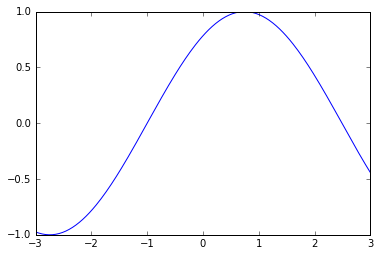

In [47]:
@interact(a=[0, 3, 0.1], b=[0, 3, 0.1])
def plot_pic(a, b):
    x = np.linspace(-3,3,200)
    plt.plot(x, np.sin(x*a+b))